Loading data...
Performing FFT...
Frequency-Domain Shape: (4320, 2001)
Reducing features using PCA to 50 components...
Training SVM Model...
Evaluating model...

--- Classification Report ---
              precision    recall  f1-score   support

  AIR_FILTER       0.94      0.94      0.94       180
  CARBURATOR       0.96      0.84      0.90       180
    IGN_COIL       0.92      0.98      0.95       180
      NORMAL       0.90      0.96      0.93       180
         OIL       0.94      0.97      0.95       180
  SPARK_PLUG       0.96      0.91      0.93       180

    accuracy                           0.93      1080
   macro avg       0.94      0.93      0.93      1080
weighted avg       0.94      0.93      0.93      1080



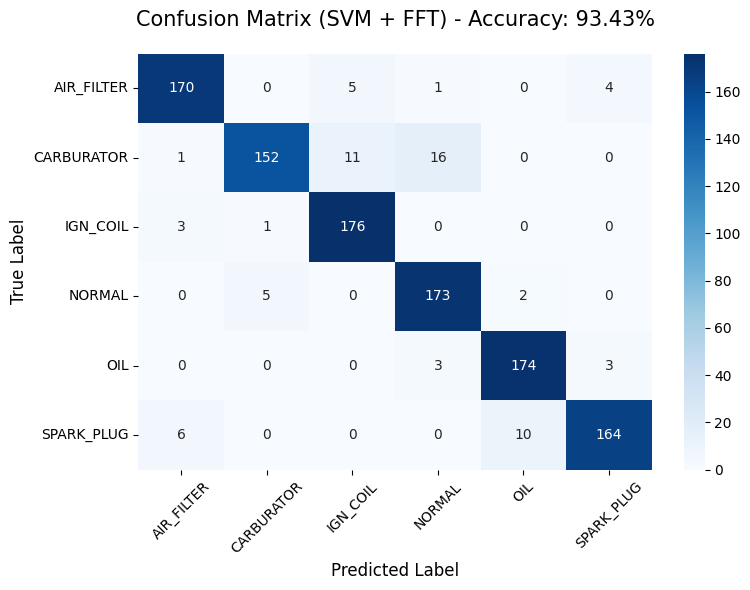

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# ==========================================
# 1. LOAD DATA
# ==========================================
print("Loading data...")
X = pd.read_csv("data/genset_vibration.csv", header=None).values
y = pd.read_csv("data/genset_label.csv", header=None).values.ravel()

target_names = np.unique(y)

# ==========================================
# 2. DSP: FEATURE EXTRACTION (FFT)
# ==========================================
print("Performing FFT...")

def apply_fft(signals):
    fft_spectrum = np.fft.rfft(signals, axis=1)

    fft_magnitude = np.abs(fft_spectrum)
    return fft_magnitude

X_fft = apply_fft(X)
print(f"Frequency-Domain Shape: {X_fft.shape}")

# ==========================================
# 3. FEATURE SELECTION (PCA)
# ==========================================
n_features = 50
print(f"Reducing features using PCA to {n_features} components...")

scaler = StandardScaler()
X_fft_scaled = scaler.fit_transform(X_fft)

pca = PCA(n_components=n_features, random_state=42)
X_pca = pca.fit_transform(X_fft_scaled)

# ==========================================
# 4. SPLIT DATA
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.25, stratify=y, random_state=42
)

# ==========================================
# 5. MODEL TRAINING (SVM Optimized)
# ==========================================
print("Training SVM Model...")

best_svm = SVC(C=1, gamma=0.01, kernel='rbf', class_weight='balanced')
best_svm.fit(X_train, y_train)

# ==========================================
# 6. EVALUATION
# ==========================================
print("Evaluating model...")
y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=target_names))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title(f"Confusion Matrix (SVM + FFT) - Accuracy: {accuracy:.2%}", fontsize=15, pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()